In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vertices = {'s':[0, 0],
            'a':[1, 2],
            'e':[1, 0.6667],
            'i':[1, -0.6667],
            'm':[1, -2],
            'b':[2, 2],
            'f':[2, 0.6667],
            'j':[2, -0.6667],
            'n':[2, -2],
            'c':[3, 2],
            'g':[3, 0.6667],
            'k':[3, -0.6667],
            'o':[3, -2],
            'd':[4, 2],
            'h':[4, 0.6667],
            'l':[4, -0.6667],
            'p':[4, -2],
            't':[5, 0]
           }
vertices = {key:np.asarray(value) for key, value in vertices.items()}
capacity = {('s', 'a'):9,
            ('s', 'e'):8,
            ('s', 'i'):7,
            ('s', 'm'):3,
            ('a', 'b'):2,
            ('a', 'n'):6,
            ('e', 'f'):6,
            ('i', 'f'):2,
            ('i', 'j'):2,
            ('m', 'j'):2,
            ('m', 'n'):4,
            ('b', 'c'):6,
            ('b', 'e'):4,
            ('b', 'g'):3,
            ('f', 'c'):6,
            ('f', 'g'):1,
            ('f', 'k'):3,
            ('j', 'g'):4,
            ('j', 'k'):5,
            ('j', 'o'):6,
            ('n', 'k'):1,
            ('n', 'o'):3,
            ('c', 'd'):2,
            ('c', 'h'):4,
            ('g', 'h'):6,
            ('g', 'l'):8,
            ('k', 'l'):1,
            ('k', 'p'):1,
            ('o', 'd'):6,
            ('o', 'p'):4,
            ('d', 't'):7,
            ('h', 't'):2,
            ('l', 't'):7,
            ('p', 't'):6,
           }

In [3]:
class MaximalFlow:
    def __init__(self, vertices, capacity):
        self.vertices = vertices.copy()
        self.residuals = capacity.copy()
        self.flow = {key:0 for key in capacity.keys()}
        self.TEXT_OFFSET = 0.035
        self.FIG_SIZE = (20, 7)
        self.ax = None
    
    def find_maximal_flow(self):
        self.draw_figure(flow_title='Flow network', residual_title='Residual network')
        while self.find_st_path() is not None:
            self.update_flows(self.find_st_path())
            self.draw_figure()
    
    def update_flows(self, path):
        f = min([self.residuals[(a, b)] for a, b in zip(path[:-1], path[1:])])
        for a, b in zip(path[:-1], path[1:]):
            self.residuals[(a, b)] -= f
            if self.residuals[(a, b)] == 0: self.residuals.pop((a, b), None)
            if (a, b) in set(self.flow.keys()):
                self.flow[(a, b)] += f
                self.residuals[(b, a)] = self.flow[(a, b)]
            else:
                self.flow[(b, a)] -= f
                self.residuals[(b, a)] -= f
    
    def find_st_path(self):
        path = self.path_to_t('s', ['s'])
        if len(path) > 0 and path[-1] == 't': return path
        return None
    
    def path_to_t(self, x, acc):
        path = []
        for a, b in self.residuals.keys():
            if a == x:
                if b == 't': return acc + [b]
                elif b not in acc: path = self.path_to_t(b, acc + [b])
            if len(path) > 0 and path[-1] == 't': return path
        return path
    
    def draw_figure(self, flow_title=None, residual_title=None):
        _, axs = plt.subplots(1, 2, figsize=self.FIG_SIZE)
        for ax, title, edges in zip(axs, [flow_title, residual_title], [self.flow, self.residuals]):
            self.ax = ax
            self.ax.axis('off')
            self.ax.set_title(title, size=20)
            self.draw_graph(edges)
        plt.show()
    
    def draw_graph(self, edges):
        self.draw_vertices()
        self.draw_edges(edges)

    def draw_vertices(self):
        self.ax.scatter(*np.asarray(list(self.vertices.values())).T, edgecolors='black', s=300, facecolors='none')
        self.label_vertices()

    def label_vertices(self):
        for label, coordinates in self.vertices.items():
            self.ax.annotate(label, coordinates - self.TEXT_OFFSET)

    def draw_edges(self, edges):
        for (a, b), capacity in edges.items():
            edge, margin, orthogonal = self.get_edge_parameters(a, b)
            origin = self.vertices[a] + margin if (b, a) not in set(edges.keys())\
                else self.vertices[a] + margin + 0.3 * orthogonal
            self.ax.arrow(*origin, *(edge - 2 * margin), color='black', width=0.012, length_includes_head=True)
            self.ax.annotate(capacity, self.vertices[a] + 2.5 * margin + orthogonal - self.TEXT_OFFSET)
    
    def get_edge_parameters(self, a, b):
        edge = self.vertices[b] - self.vertices[a]
        margin = edge/np.linalg.norm(edge) * 0.2
        orthogonal = self.get_orthonormal(edge) * 0.1
        return edge, margin, orthogonal
    
    @staticmethod
    def get_orthonormal(vector):
        return np.asarray([-vector[1], vector[0]])/np.linalg.norm(np.asarray([-vector[1], vector[0]]))

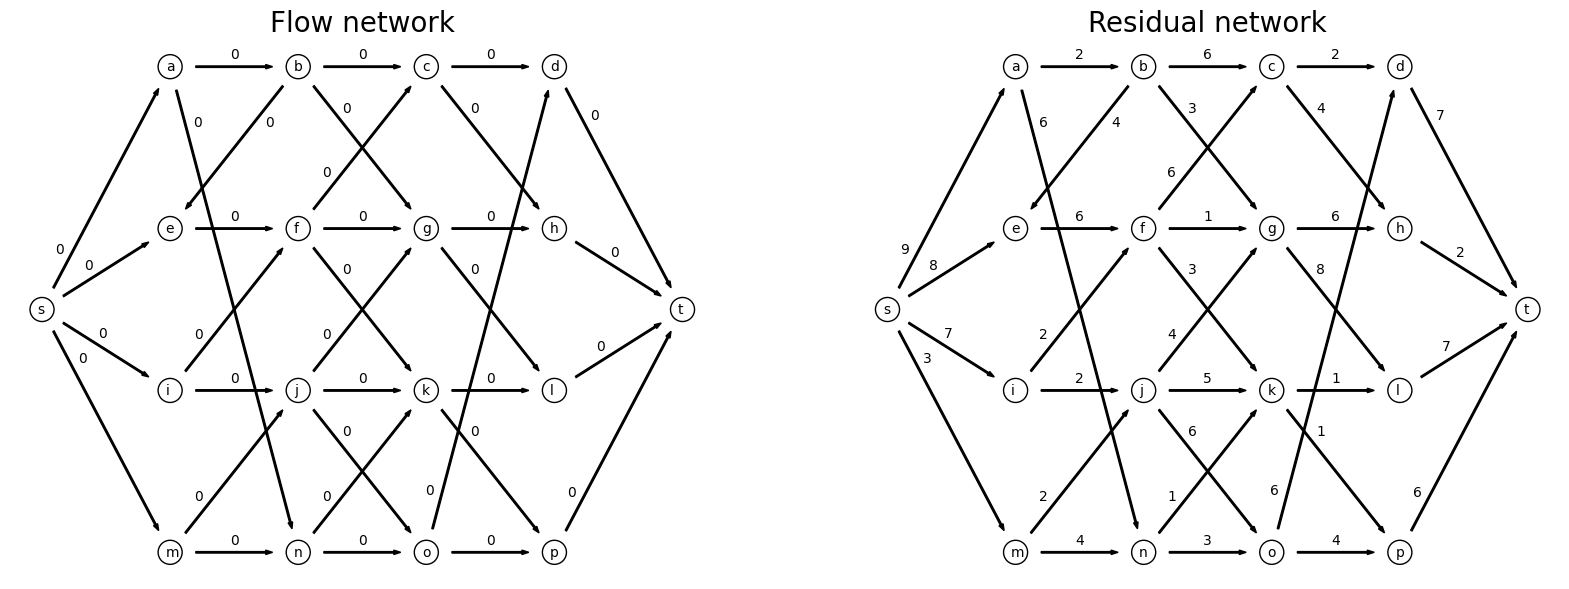

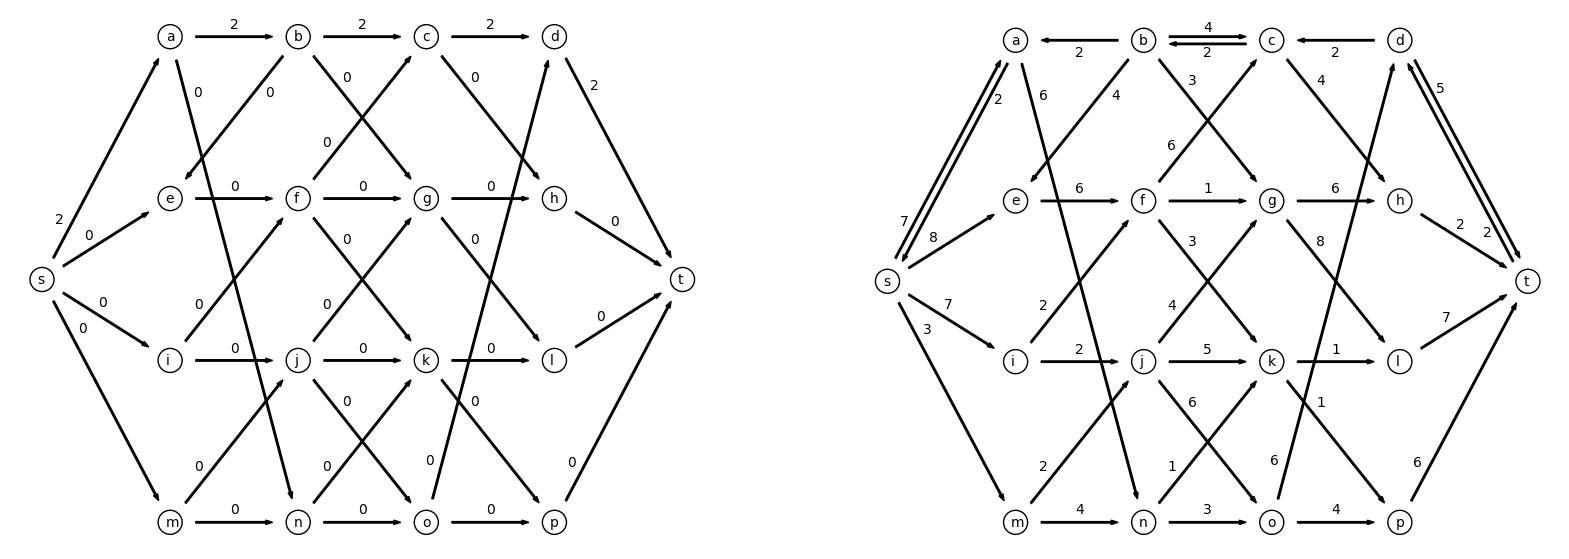

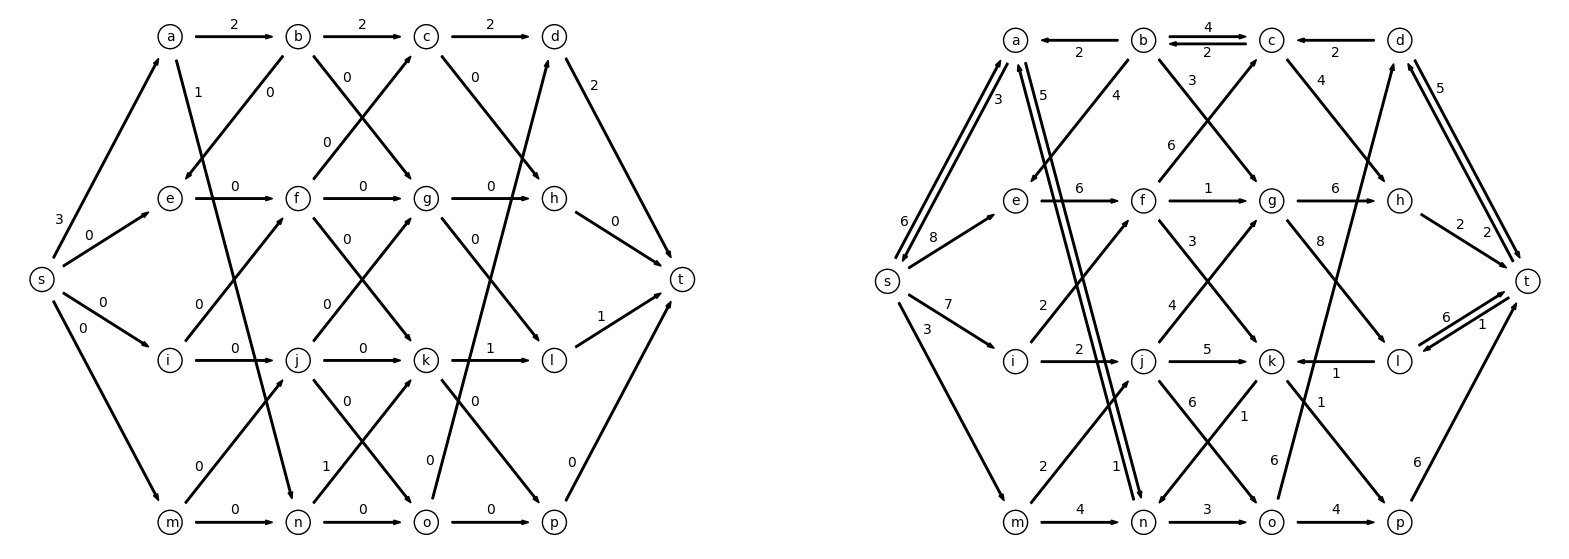

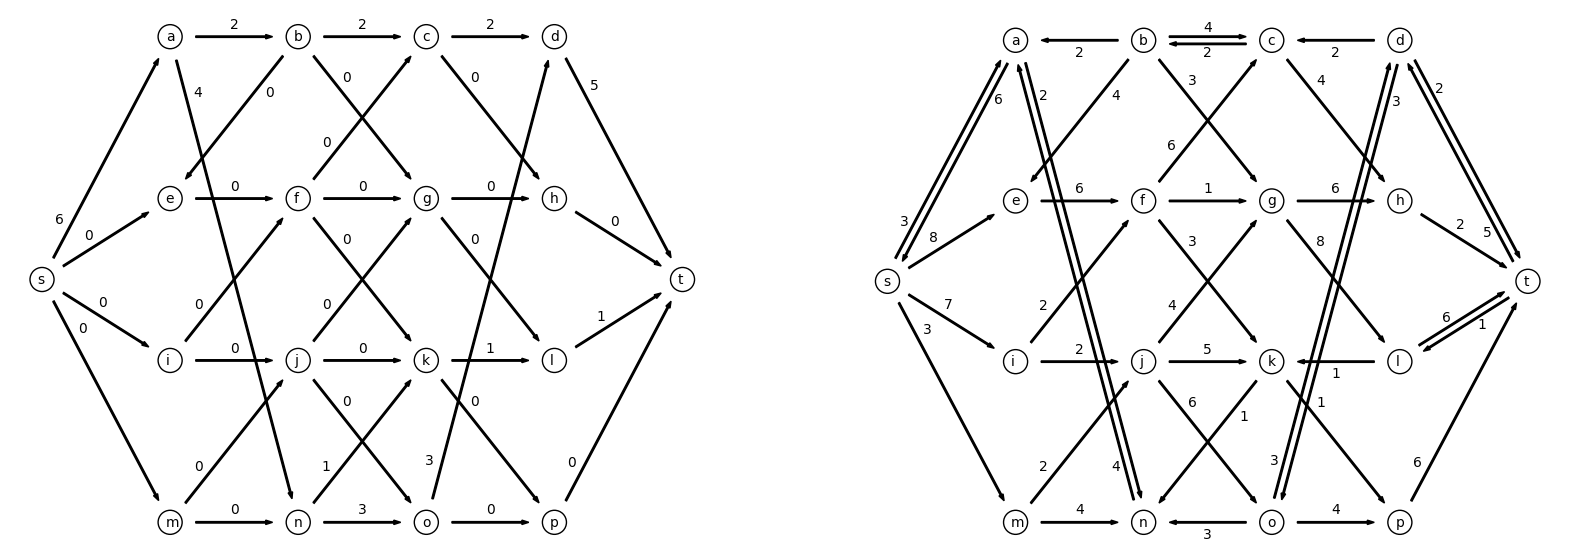

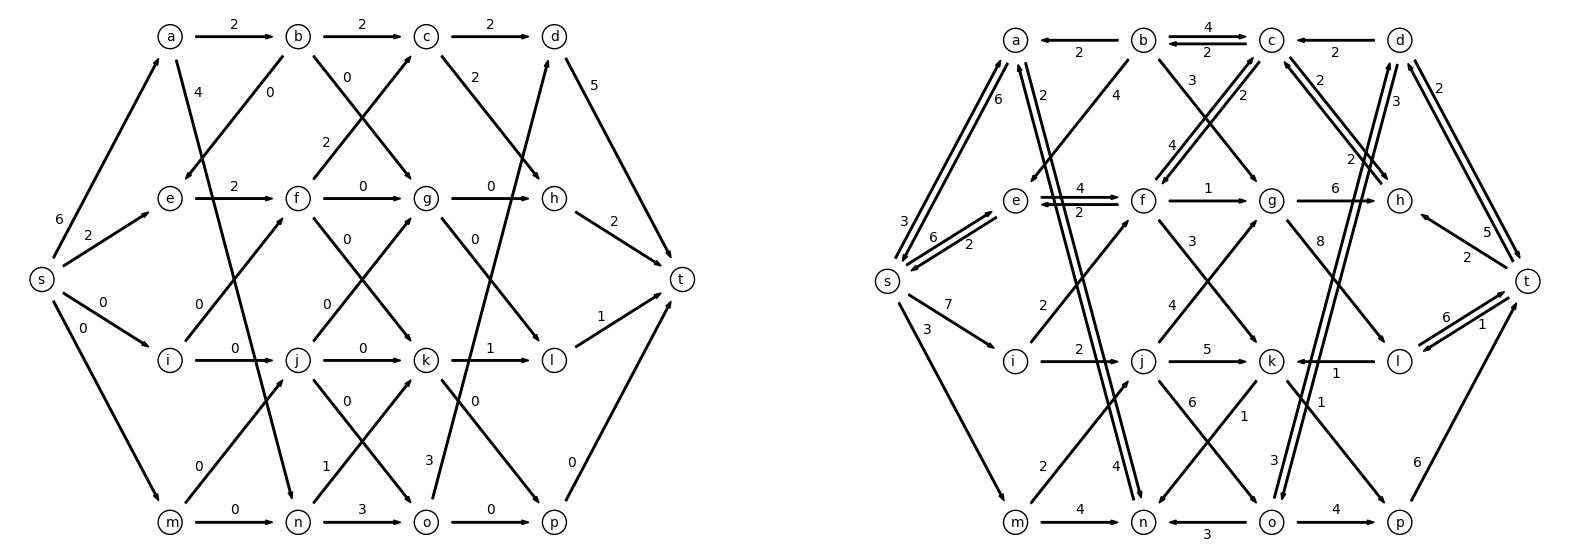

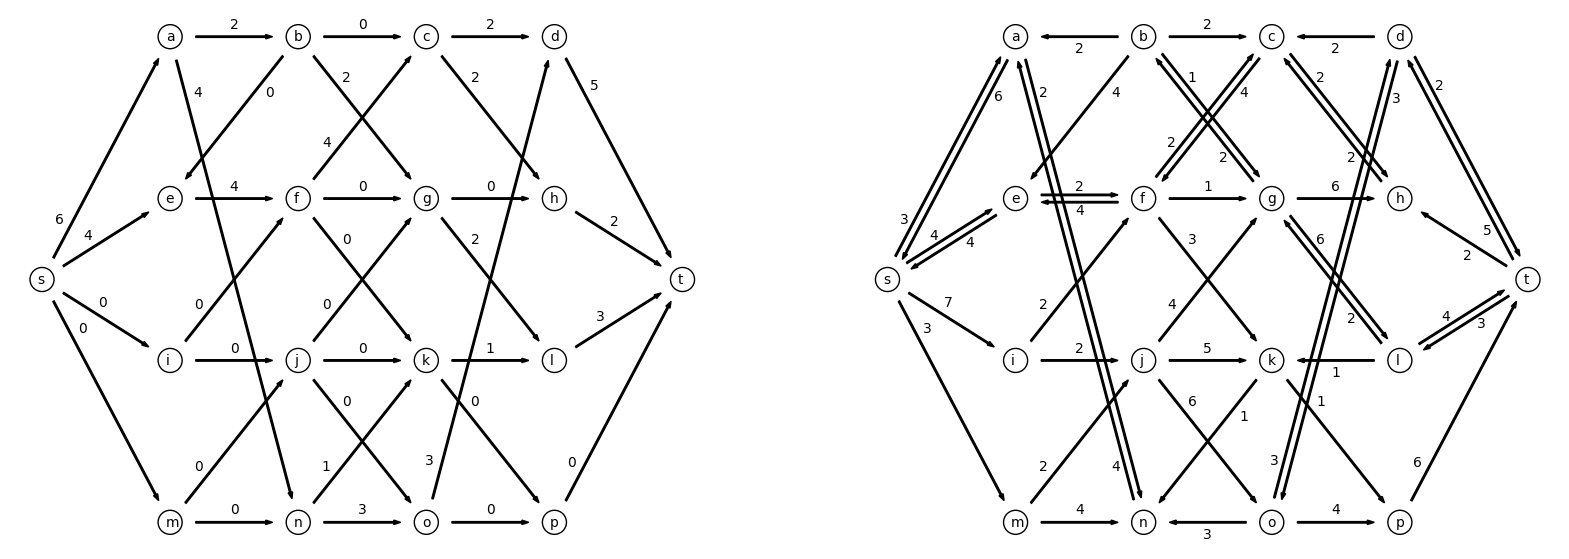

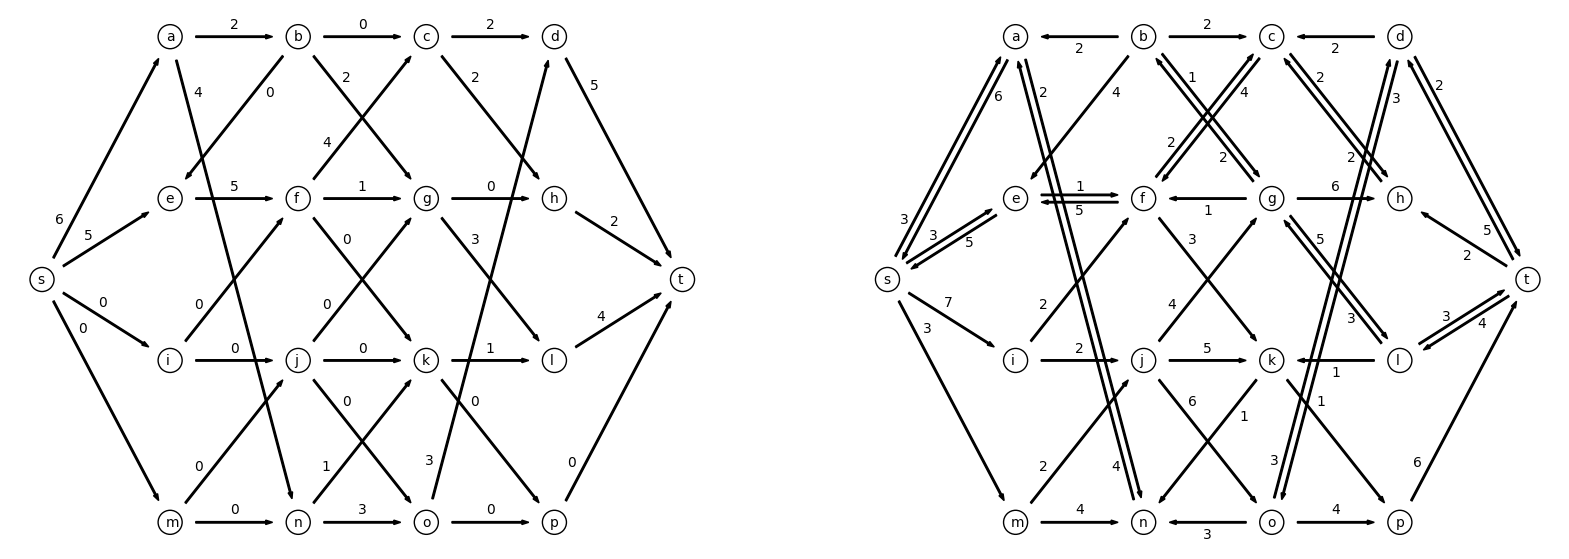

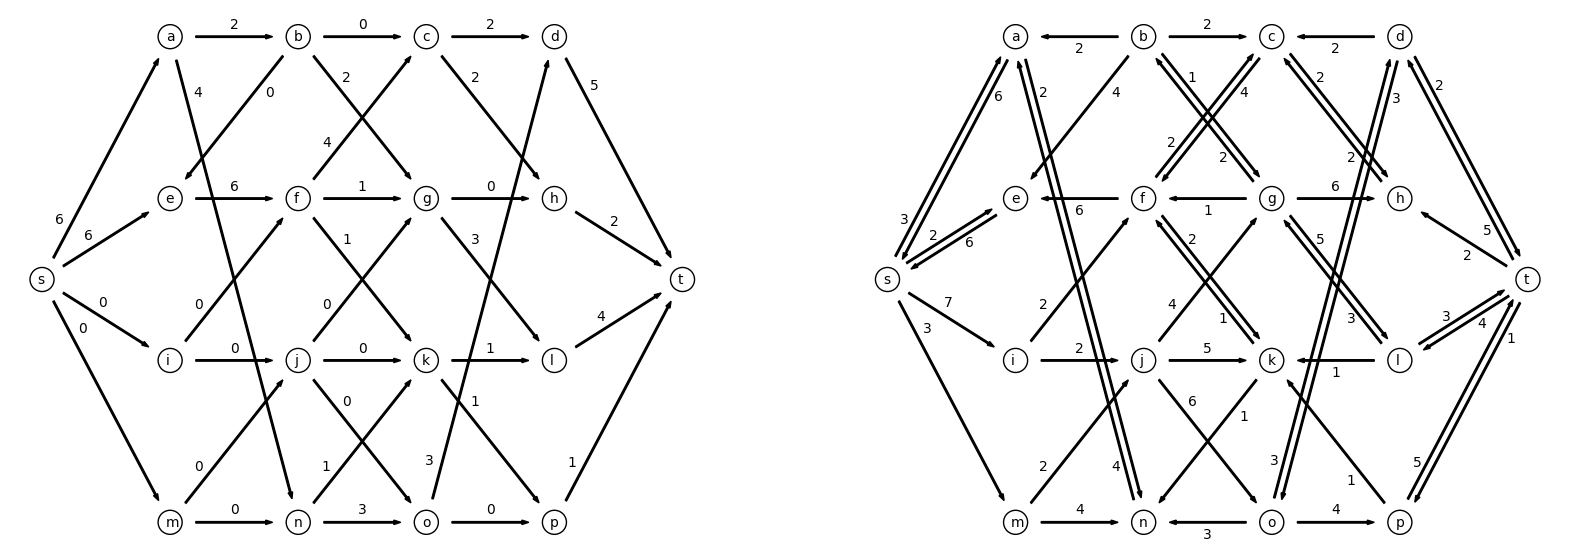

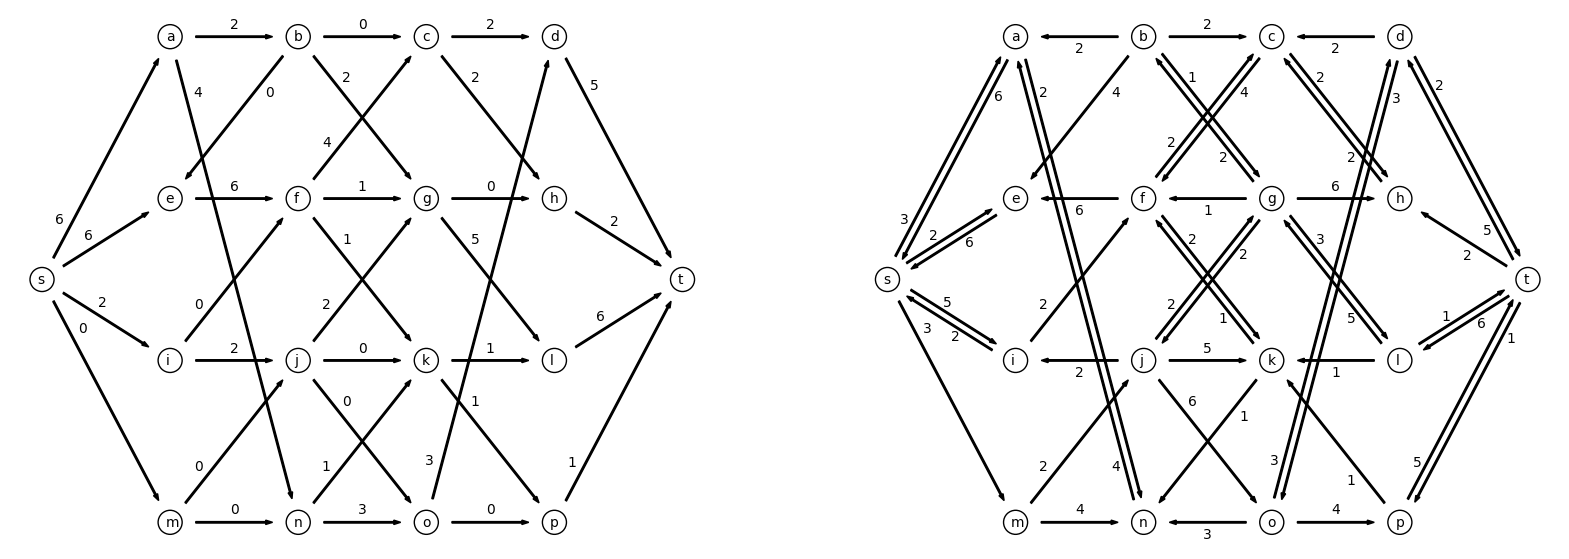

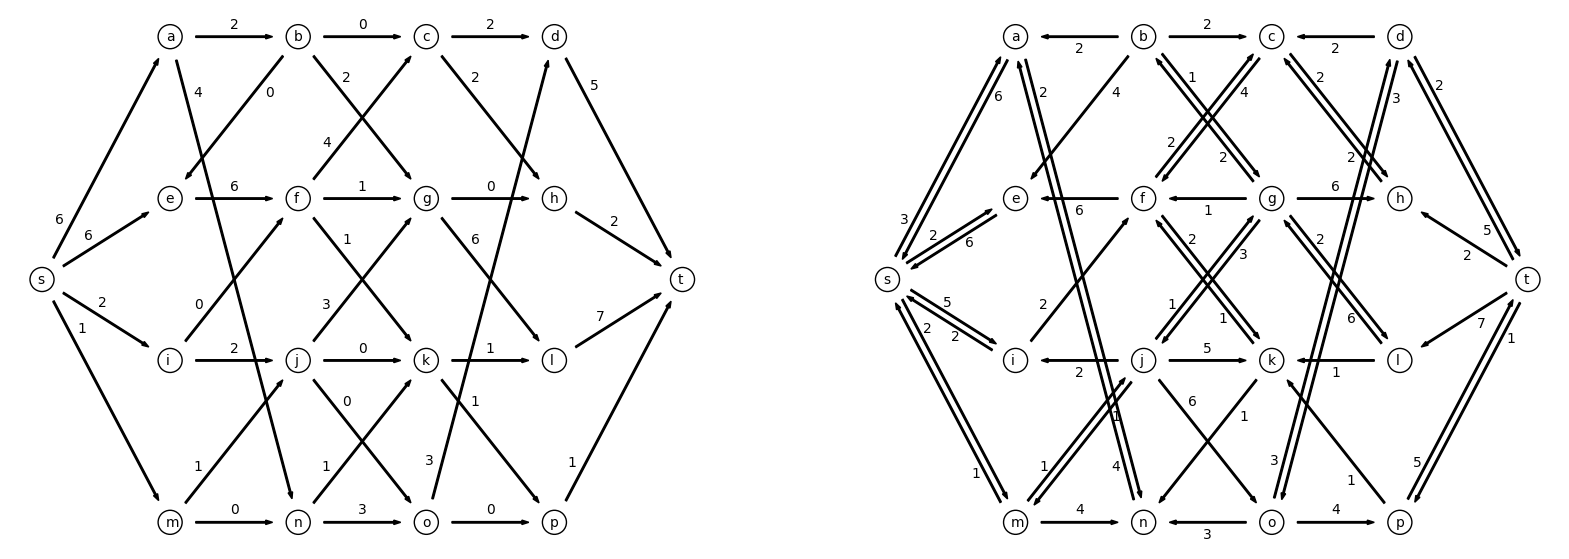

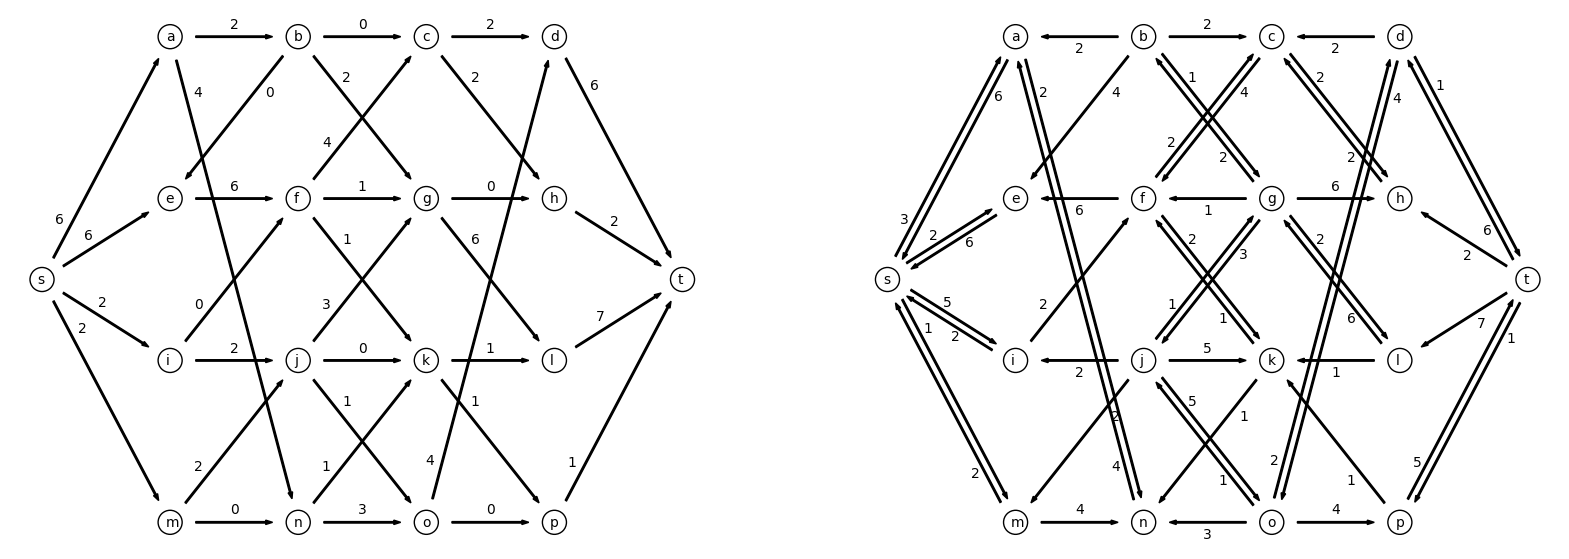

In [4]:
mf = MaximalFlow(vertices, capacity)
mf.find_maximal_flow()